# User-Based Collaborative Filtering

In [6]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import statistics
import operator

In [9]:
df = pd.read_csv("/content/anime.csv")

In [12]:
def get_observation(df: pd.DataFrame):
    """Displays key information about a DataFrame and returns a summary dictionary."""

    # Prepare results
    summary = {
        "head": df.head(),
        "info": df.info(),  # Prints but does not return a value
        "description": df.describe(),
        "missing_values": df.isnull().sum(),
        "columns": df.columns.tolist()
    }

    # Display results neatly
    print("\n" + "*" * 30 + "\nHead of DataFrame:\n", summary["head"])
    print("\n" + "*" * 30 + "\nInfo:")
    df.info()
    print("\n" + "*" * 30 + "\nDescription:\n", summary["description"])
    print("\n" + "*" * 30 + "\nMissing Values:\n", summary["missing_values"])
    print("\n" + "*" * 30 + "\nColumns:\n", summary["columns"])

    return summary  # Returns useful information as a dictionary

summary = get_observation(df)

print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB

******************************
Head of DataFrame:
    anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatur

In [8]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [13]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [14]:
df.type.value_counts()

,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488


In [15]:
df.type.isnull().sum()

25

In [16]:

def fillnaWithValue(value:str, df: pd.DataFrame, column:str)->pd.DataFrame:
  """Fills NaN values in a specific column with the given value."""
  df[column].fillna(value, inplace=True)


fillnaWithValue('Unknown', df, 'genre')
fillnaWithValue('Unknown', df, 'type')

<ipython-input-16-dab4f239a71d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [19]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0)

In [20]:

df['rating'].fillna(df['rating'].mean(), inplace=True)

<ipython-input-20-41033151a968>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  float64
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [23]:
df.describe()

,anime_id,episodes,rating,members
count,12294.000000,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,12.040101,6.473902,1.807134e+04
std,11455.294701,46.257299,1.017096,5.482068e+04
min,1.000000,0.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.900000,2.250000e+02
50%,10260.500000,2.000000,6.550000,1.550000e+03
75%,24794.500000,12.000000,7.170000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


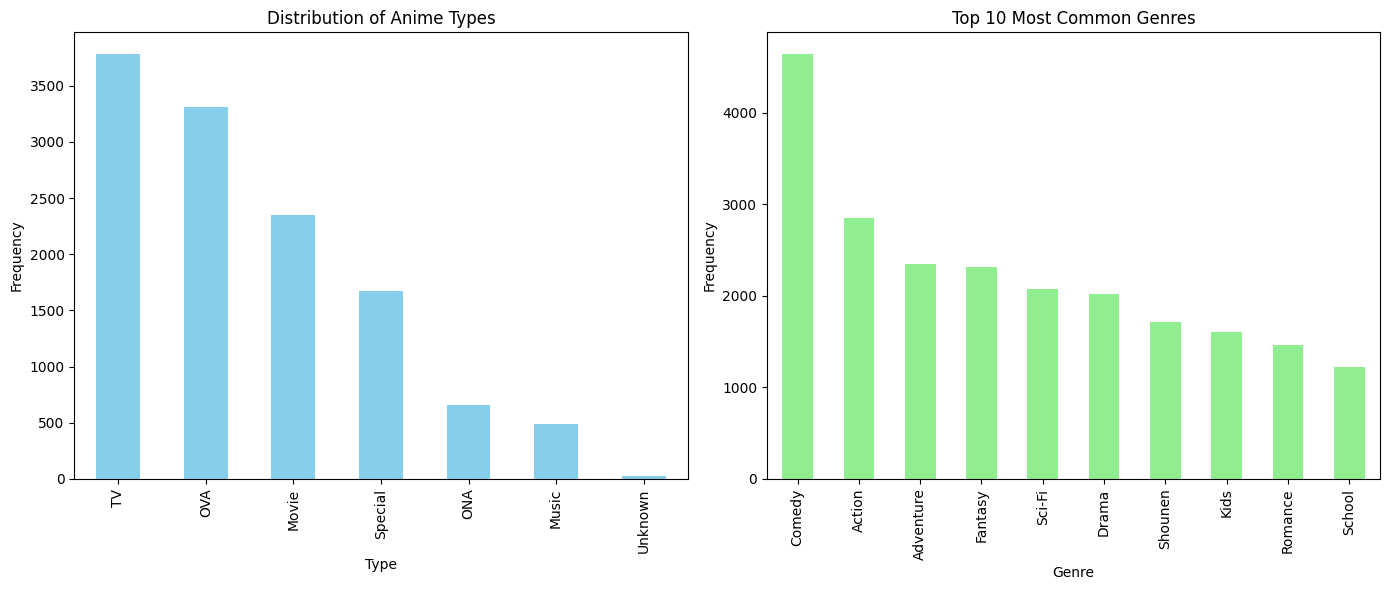

In [24]:
# Analyzing categorical variables
type_counts = df['type'].value_counts()
genre_counts = df['genre'].str.split(', ').explode().value_counts().head(10)

# Plotting the distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

type_counts.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Anime Types')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Type')

genre_counts.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Top 10 Most Common Genres')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Genre')

plt.tight_layout()
plt.show()

In [25]:
ratings = pd.read_csv('rating.csv')

In [26]:
ratings = ratings[ratings.rating != -1]
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [27]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6337241 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


In [28]:
ratings.isnull().sum()

,0
user_id,0
anime_id,0
rating,0


In [29]:
ratings_dropped = ratings.dropna()

In [30]:
ratings.describe()

,user_id,anime_id,rating
count,6.337241e+06,6.337241e+06,6.337241e+06
mean,3.674791e+04,8.902866e+03,7.808497e+00
std,2.101340e+04,8.882000e+03,1.572496e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.898400e+04,1.239000e+03,7.000000e+00
50%,3.681500e+04,6.213000e+03,8.000000e+00
75%,5.487300e+04,1.407500e+04,9.000000e+00
max,7.351600e+04,3.447500e+04,1.000000e+01


In [31]:
len(ratings)

6337241

In [32]:
len(ratings['user_id'].unique())

69600

In [33]:
ratings_per_user = ratings.groupby('user_id')['rating'].count()

In [34]:
mean_ratings_per_user = statistics.mean(ratings_per_user.tolist())
mean_ratings_per_user

91.05231321839081

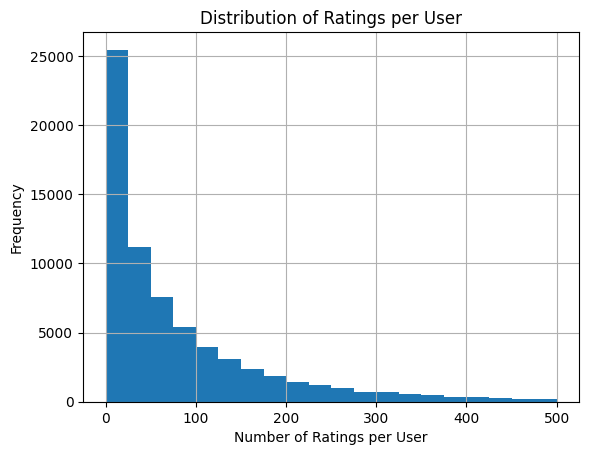

In [35]:
ratings_per_user.hist(bins=20, range=(0,500))
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User')
plt.show()

In [36]:
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()

# Calculate the mean number of ratings per anime
mean_ratings_per_anime = statistics.mean(ratings_per_anime.tolist())
mean_ratings_per_anime

638.3843054296364

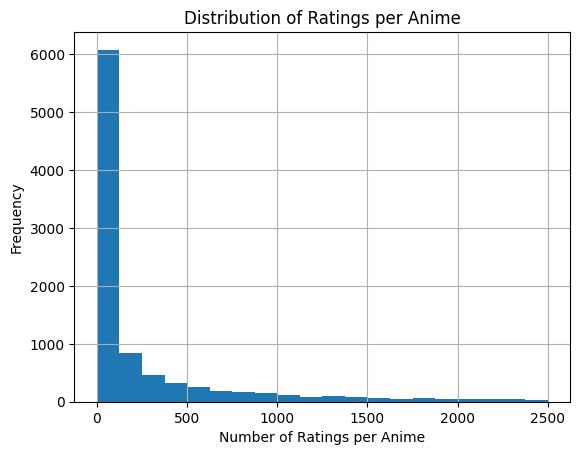

In [37]:
ratings_per_anime.hist(bins=20, range=(0,2500))
plt.xlabel('Number of Ratings per Anime')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per Anime')
plt.show()

In [38]:
# Create a DataFrame from the ratings per anime data
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)

# Filter the DataFrame to include only anime with 1000 or more ratings
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]

# Extract the indices (anime IDs) of popular anime
popular_anime = filtered_ratings_per_anime_df.index.tolist()

In [39]:
# Create a DataFrame from the ratings per user data
ratings_per_user_df = pd.DataFrame(ratings_per_user)

# Filter the DataFrame to include only users with 500 or more ratings
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 500]

# Extract the indices (user IDs) of prolific users
prolific_users = filtered_ratings_per_user_df.index.tolist()

In [40]:
# Filter the ratings dataset to include only ratings for popular anime
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime)]

# Further filter the ratings dataset to include only ratings from prolific users
filtered_ratings = ratings[ratings.user_id.isin(prolific_users)]

# Calculate the length of the filtered ratings dataset
len(filtered_ratings)

1005314

In [41]:
# Create a pivot table to construct the user-item rating matrix
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')

# Fill missing values (NaN) with 0
rating_matrix = rating_matrix.fillna(0)

# Display the first few rows of the user-item rating matrix
rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.metrics.pairwise import cosine_similarity
import operator

def similar_users(user_id, matrix, k=3):
    # Retrieve the user's vector from the rating matrix
    user = matrix[matrix.index == user_id]

    # Exclude the user's vector from the rating matrix
    other_users = matrix[matrix.index != user_id]

    # Calculate cosine similarity between the user and other users
    similarities = cosine_similarity(user, other_users)[0].tolist()

    # Get the indices (user IDs) of other users
    indices = other_users.index.tolist()

    # Create a dictionary mapping indices to similarity scores
    index_similarity = dict(zip(indices, similarities))

    # Sort the dictionary by similarity scores in descending order
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()

    # Get the top k similar users
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]

    return users

In [43]:
# Define the current user's ID
current_user = 226

# Find indices of similar users to the current user
similar_user_indices = similar_users(current_user, rating_matrix)

# Print the indices of similar users
print(similar_user_indices)

[30773, 39021, 45603]


In [44]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    # Select rows corresponding to similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]

    # Calculate the mean rating for each item among similar users
    similar_users = similar_users.mean(axis=0)

    # Convert the result to a DataFrame
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])

    # Select the target user's ratings
    user_df = matrix[matrix.index == user_index]

    # Transpose the DataFrame for easier manipulation
    user_df_transposed = user_df.transpose()

    # Rename the column for clarity
    user_df_transposed.columns = ['rating']

    # Filter out items that the target user has already rated
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]

    # Extract the indices (anime IDs) of unseen items
    animes_unseen = user_df_transposed.index.tolist()

    # Filter the DataFrame to include only ratings for unseen items
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]

    # Sort the DataFrame by mean rating in descending order
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)

    # Select the top n items with the highest mean rating
    top_n_anime = similar_users_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()

    # Retrieve information about the recommended anime from the 'animes' dataset
    anime_information = df[df['anime_id'].isin(top_n_anime_indices)]

    return anime_information

recommend_item(226, similar_user_indices, rating_matrix)

,anime_id,name,genre,type,episodes,rating,members
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,9.13,425855
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25.0,8.71,133620
87,10030,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25.0,8.53,151561
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25.0,8.45,633817
184,7674,Bakuman.,"Comedy, Romance, Shounen",TV,25.0,8.35,246899


# Item-Based Collaborative Filtering

In [45]:
# Define the dataset representing ratings given by users to various TV shows
dataset = {
    'user1': {'Mindhunter': 5, 'You': 3, 'Dexter': 3, 'Mr. Robot': 3, 'True Detective': 2, 'Twin Peaks': 3},
    'user2': {'Mindhunter': 5, 'You': 3, 'Mr. Robot': 5, 'Dexter': 5, 'Twin Peaks': 3, 'True Detective': 3},
    'user3': {'Mindhunter': 2, 'Dexter': 5, 'Mr. Robot': 3, 'Twin Peaks': 4},
    'user4': {'Dexter': 5, 'Twin Peaks': 4, 'Mr. Robot': 4},
    'user5': {'Mindhunter': 4, 'You': 4, 'Dexter': 4, 'Twin Peaks': 3, 'True Detective': 2},
    'user6': {'Mindhunter': 3, 'Dexter': 4, 'Twin Peaks': 3, 'Mr. Robot': 5, 'True Detective': 3},
    'user7': {'Dexter': 4, 'True Detective': 1, 'Mr. Robot': 4}
}

In [46]:
# Convert the dataset dictionary to a DataFrame
dataset_df = pd.DataFrame(dataset)

# Fill missing values (NaN) with "Not Seen Yet"
dataset_df.fillna("Not Seen Yet", inplace=True)

# Display the DataFrame
dataset_df

<ipython-input-46-df7468bb6187>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Seen Yet' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset_df.fillna("Not Seen Yet", inplace=True)


,user1,user2,user3,user4,user5,user6,user7
Mindhunter,5,5,2.0,Not Seen Yet,4.0,3.0,Not Seen Yet
You,3,3,Not Seen Yet,Not Seen Yet,4.0,Not Seen Yet,Not Seen Yet
Dexter,3,5,5.0,5.0,4.0,4.0,4.0
Mr. Robot,3,5,3.0,4.0,Not Seen Yet,5.0,4.0
True Detective,2,3,Not Seen Yet,Not Seen Yet,2.0,3.0,1.0
Twin Peaks,3,3,4.0,4.0,3.0,3.0,Not Seen Yet


In [47]:
def unique_items():
    # Initialize an empty list to store unique items
    unique_items_list = []

    # Iterate through each person in the dataset
    for person in dataset.keys():
        # Iterate through the items rated by each person
        for items in dataset[person]:
            # Append each item to the unique_items_list
            unique_items_list.append(items)

    # Convert the list to a set to remove duplicates
    s = set(unique_items_list)

    # Convert the set back to a list to maintain the order of items
    unique_items_list = list(s)

    # Return the list of unique items
    return unique_items_list

In [48]:
unique_items()

['Twin Peaks', 'True Detective', 'Mindhunter', 'Dexter', 'You', 'Mr. Robot']

In [49]:
def item_similarity(item1, item2):
    # Initialize a dictionary to store ratings of both items by common users
    both_rated = {}

    # Iterate through each person in the dataset
    for person in dataset.keys():
        # Check if both items are rated by the current person
        if item1 in dataset[person] and item2 in dataset[person]:
            # Store the ratings of both items by the current person
            both_rated[person] = [dataset[person][item1], dataset[person][item2]]

    # Calculate the number of ratings both items share
    number_of_ratings = len(both_rated)

    # If there are no common ratings, return 0 (indicating no similarity)
    if number_of_ratings == 0:
        return 0

    # Extract ratings of item1 and item2 by common users
    item1_ratings = [[dataset[k][item1] for k, v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
    item2_ratings = [[dataset[k][item2] for k, v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]

    # Calculate cosine similarity between item1 and item2 ratings
    cs = cosine_similarity(item1_ratings, item2_ratings)

    # Return the cosine similarity score
    return cs[0][0]

In [50]:
print("Cosine Similarity:", item_similarity('Dexter', 'Mr. Robot'))

Cosine Similarity: 0.9749005254295224


In [51]:
def most_similar_items(target_item):
    # Obtain a list of all unique items
    un_lst = unique_items()

    # Calculate similarity scores between the target item and all other items
    scores = [(item_similarity(target_item, other_item), target_item + " --> " + other_item) for other_item in un_lst if other_item != target_item]

    # Sort the similarity scores in descending order
    scores.sort(reverse=True)

    # Return the sorted similarity scores
    return scores

In [52]:
print(most_similar_items('Dexter'))

[(0.9908301680442989, 'Dexter --> Twin Peaks'), (0.9749005254295224, 'Dexter --> Mr. Robot'), (0.9701425001453318, 'Dexter --> You'), (0.9563650695950072, 'Dexter --> True Detective'), (0.9199418174856334, 'Dexter --> Mindhunter')]


In [53]:
def target_shows_to_users(target_person):
    # Initialize a list to store tv shows rated by the target person
    target_person_show_lst = []

    # Obtain a list of all unique items (movies)
    unique_list = unique_items()

    # Collect tv sows rated by the target person
    for shows in dataset[target_person]:
        target_person_show_lst.append(shows)

    # Convert the unique item list to a set to perform set difference operation
    s = set(unique_list)

    # Get the list of recommended tv shows by finding the set difference between all tv shows and those rated by the target person
    recommended_shows = list(s.difference(target_person_show_lst))

    # Calculate the number of recommended tv shows
    a = len(recommended_shows)

    # If there are no recommended tv shows, return 0
    if a == 0:
        return 0

    # Otherwise, return the list of recommended tv shows and the list of tv shows rated by the target person
    return recommended_shows, target_person_show_lst

In [54]:
# Obtain lists of unseen and seen tv shows for user 'user7' using the target_shows_to_users function
unseen_shows, seen_shows = target_shows_to_users('user7')

# Create a dictionary to store unseen and seen movies
dct = {"Seen Shows": seen_shows, "Unseen Shows": unseen_shows}

# Convert the dictionary to a DataFrame for better visualization
pd.DataFrame(dct)

,Seen Shows,Unseen Shows
0,Dexter,Twin Peaks
1,True Detective,You
2,Mr. Robot,Mindhunter


# Model-Based Collaborative Filtering

In [55]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    # Transpose Q matrix to match dimensions for matrix multiplication
    Q = Q.T

    # Iterate through the specified number of steps
    for step in range(steps):
        # Iterate through each element of the rating matrix R
        for i in range(len(R)):
            for j in range(len(R[i])):
                # Check if the rating is non-zero
                if R[i][j] > 0:
                    # Calculate error between actual and predicted rating
                    eij = R[i][j] - np.dot(P[i, :], Q[:, j])

                    # Update P and Q matrices using gradient descent
                    for k in range(K):
                        P[i][k] += alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] += alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        # Compute the total error
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e += pow(R[i][j] - np.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e += (beta / 2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))

        # Check if error is below the specified threshold
        if e < 0.001:
            break

    # Return the updated P and Q matrices
    return P, Q.T

In [56]:
# Define the original rating matrix R
R = [
     [5, 3, 0, 1],
     [4, 0, 0, 1],
     [1, 1, 0, 5],
     [1, 0, 0, 4],
     [0, 1, 5, 4],
    ]

# Convert R into a NumPy array
R = np.array(R)

# Determine the number of users (N) and items (M)
N = len(R)
M = len(R[0])

# Specify the number of latent factors (K) for matrix factorization
K = 2

# Initialize matrices P and Q with random values
P = np.random.rand(N, K)  # Matrix representing user latent factors
Q = np.random.rand(M, K)  # Matrix representing item latent factors

# Print initialized matrices for verification
print("R (Rating matrix):")
print(R)
print("\nP (User latent factor matrix):")
print(P)
print("\nQ (Item latent factor matrix):")
print(Q)

R (Rating matrix):
[[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]

P (User latent factor matrix):
[[0.66386826 0.68096829]
 [0.68641987 0.27761095]
 [0.51689074 0.85078561]
 [0.13896973 0.17759789]
 [0.47149375 0.55066086]]

Q (Item latent factor matrix):
[[0.21482946 0.95807986]
 [0.65693364 0.16357185]
 [0.06302149 0.27528793]
 [0.88132042 0.76463501]]


In [57]:
# Perform matrix factorization to optimize matrices P and Q
nP, nQ = matrix_factorization(R, P, Q, K)

# Reconstruct the rating matrix using optimized matrices P and Q
nR = np.dot(nP, nQ.T)

# Print the reconstructed rating matrix
print("Reconstructed Rating Matrix (nR):")
print(nR)

Reconstructed Rating Matrix (nR):
[[5.08265667 2.68808973 4.9798806  1.00399159]
 [3.91157648 2.07122111 3.96433206 0.99864606]
 [1.11178969 0.64029141 3.86244754 4.97252552]
 [0.94734432 0.54273416 3.13993975 3.97787435]
 [2.88103959 1.56166621 4.83562258 4.01892662]]


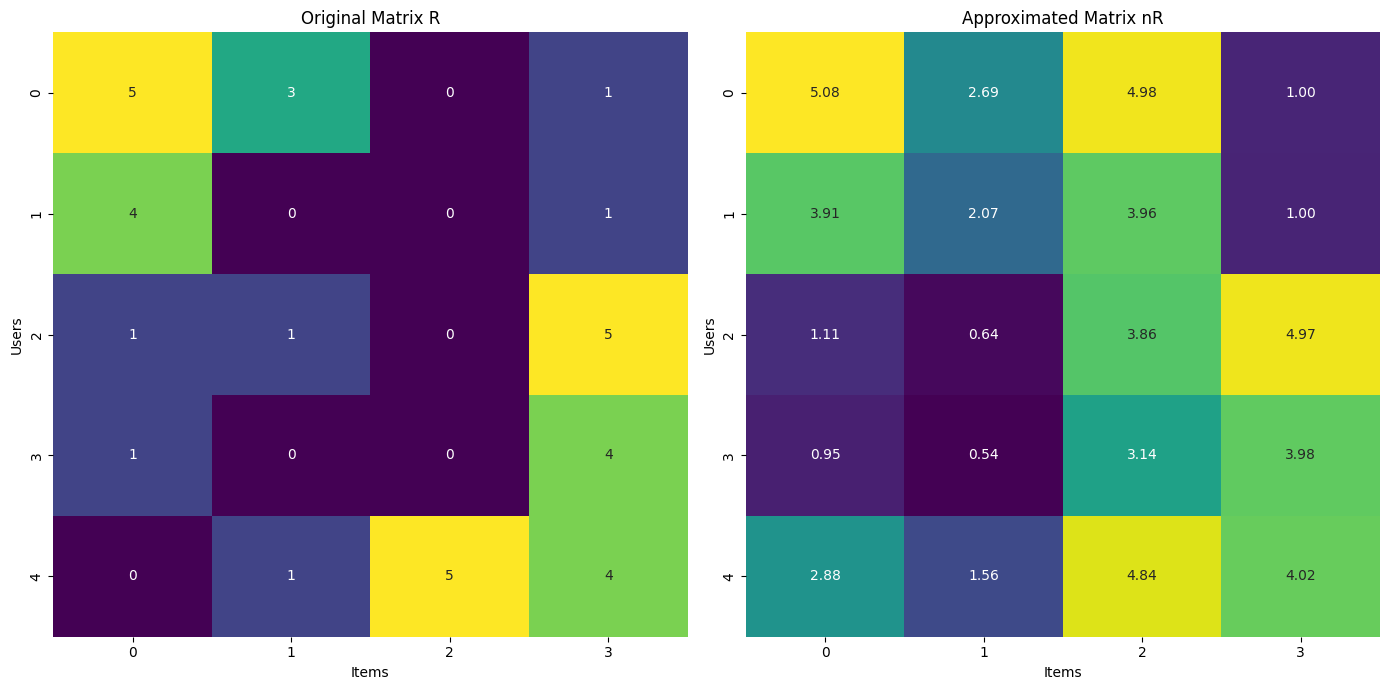

In [58]:
# Plotting the original and approximated matrices
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.heatmap(R, annot=True, fmt="g", cmap='viridis', ax=axs[0], cbar=False)
axs[0].set_title('Original Matrix R')
axs[0].set_xlabel('Items')
axs[0].set_ylabel('Users')

sns.heatmap(nR, annot=True, fmt=".2f", cmap='viridis', ax=axs[1], cbar=False)
axs[1].set_title('Approximated Matrix nR')
axs[1].set_xlabel('Items')
axs[1].set_ylabel('Users')

plt.tight_layout()
plt.show()

# SVD in Collaborative Filtering

In [59]:
# Define the column names for the DataFrame
header = ['user_id', 'item_id', 'rating', 'timestamp']

# Read the data from the file 'u.data' into a DataFrame using pandas
# The data is tab-separated ('\t'), and column names are provided by 'header'
df = pd.read_csv('u.data', sep='\t', names=header)

# Display the first few rows of the DataFrame to check the data
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [60]:
n_users = df.user_id.unique().shape[0]

In [61]:
n_items = df.item_id.unique().shape[0]

In [63]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.25)

In [64]:
train_data_mat = np.zeros((n_users, n_items))

for line in train_data.itertuples():
    train_data_mat[line[1]-1, line[2]-1] = line[3]

test_data_mat = np.zeros((n_users, n_items))


for line in test_data.itertuples():
    test_data_mat[line[1]-1, line[2]-1] = line[3]

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt


def rmse(prediction, ground_truth):
    # Extract non-zero elements from 'prediction' and 'ground_truth'
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()

    # Calculate the Root Mean Squared Error (RMSE) between 'prediction' and 'ground_truth'
    return sqrt(mean_squared_error(prediction, ground_truth))

In [66]:
sparsity = round(1.0 - len(df) / float(n_users * n_items), 3)

# Print the sparsity level as a percentage
print(f'The sparsity level of MovieLens100K is {sparsity * 100:.2f}%')

The sparsity level of MovieLens100K is 93.70%


In [67]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

# Perform Singular Value Decomposition (SVD) on the training data matrix
# 'k' specifies the number of singular values and vectors to compute
u, s, vt = svds(train_data_mat, k=20)

# Convert the singular values 's' into a diagonal matrix
s_diag_matrix = np.diag(s)

# Reconstruct the original matrix using the computed U, S, and V matrices
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

# Print the Root Mean Squared Error (RMSE) of the user-based collaborative filtering predictions
print('User-based collaborative filtering RMSE: ' + str(rmse(X_pred, test_data_mat)))


User-based collaborative filtering RMSE: 2.718605378631681


# Content Filtering

In [68]:
# Define item profiles (attributes: [genre, length, director])
item_profiles = {
    'Item1': np.array([1, 0, 1]),  # Example: Genre1, Length2, Director1
    'Item2': np.array([0, 1, 1]),
    'Item3': np.array([1, 1, 0]),
}

# User ratings for items (rating scale: 1-5)
user_ratings = {
    'Item1': 5,
    'Item2': 3,
    'Item3': 4,
}

# Construct user profile by averaging the attribute vectors of rated items
user_profile = np.zeros(len(item_profiles['Item1']))
rated_items = 0

for item, rating in user_ratings.items():
    user_profile += item_profiles[item] * rating
    rated_items += 1

user_profile /= rated_items

print("User profile vector:", user_profile)

# New item to recommend (attributes)
new_item_profile = np.array([1, 1, 0])  # Example: Genre1, Length2, Director1

# Compute cosine similarity between user profile and new item profile
similarity = cosine_similarity([user_profile], [new_item_profile])

print("Cosine similarity between user profile and new item:", similarity[0][0])

User profile vector: [3.         2.33333333 2.66666667]
Cosine similarity between user profile and new item: 0.8122769321068952


# Hybrid Filtering

In [69]:
# Example collaborative filtering scores
cf_scores = np.array([
    [4.0, 3.5, 3.0],
    [2.5, 4.0, 4.5],
    [3.5, 4.5, 5.0]
])

# Example content-based filtering scores
cb_scores = np.array([
    [3.5, 3.0, 4.0],
    [3.0, 4.0, 4.0],
    [4.0, 4.5, 3.5]
])

# Combine the scores with a weighted average
alpha = 0.5
hybrid_scores = alpha * cf_scores + (1 - alpha) * cb_scores

print("Collaborative Filtering Scores:\n", cf_scores)
print("Content-Based Filtering Scores:\n", cb_scores)
print("Hybrid Scores:\n", hybrid_scores)

Collaborative Filtering Scores:
 [[4.  3.5 3. ]
 [2.5 4.  4.5]
 [3.5 4.5 5. ]]
Content-Based Filtering Scores:
 [[3.5 3.  4. ]
 [3.  4.  4. ]
 [4.  4.5 3.5]]
Hybrid Scores:
 [[3.75 3.25 3.5 ]
 [2.75 4.   4.25]
 [3.75 4.5  4.25]]


# Advanced Techniques in Recommendation Systems

### GetTopN Function


The `GetTopN` function is commonly used in recommendation systems to retrieve the top N recommended items for each user. This is particularly useful for generating personalized recommendation lists.

Usage

The `GetTopN` function typically works by taking a matrix of predicted ratings and returning the top N items with the highest predicted ratings for each user. This helps in creating a ranked list of recommendations tailored to the user's preferences.

In [70]:
def GetTopN(predictions, n=10):
    top_n = {}
    for user_id in range(predictions.shape[0]):
        user_ratings = predictions[user_id]
        top_n[user_id] = np.argsort(user_ratings)[::-1][:n]
    return top_n

# Example predicted ratings matrix (users x items)
predicted_ratings = np.array([
    [3.5, 2.0, 4.5, 1.0, 5.0],
    [1.0, 4.0, 3.0, 4.5, 2.0],
    [4.0, 2.5, 3.5, 4.0, 5.0],
])

# Get top 3 recommendations for each user
top_n_recommendations = GetTopN(predicted_ratings, n=3)
print("Top N Recommendations:")
for user, recommendations in top_n_recommendations.items():
    print(f"User {user}: Items {recommendations}")

Top N Recommendations:
User 0: Items [4 2 0]
User 1: Items [3 1 2]
User 2: Items [4 3 0]


### Hit Rate

The Hit Rate is a metric used to evaluate the effectiveness of a recommendation system. It measures the proportion of users for whom the recommended list contains at least one relevant item.

Usage

The Hit Rate is calculated by dividing the number of users who received at least one relevant recommendation by the total number of users. It gives an indication of how well the recommendation system is performing in terms of hitting the target for each user.

In [71]:
def HitRate(top_n_recommendations, true_ratings, threshold=3.5):
    hits = 0
    total_users = len(top_n_recommendations)

    for user, recommendations in top_n_recommendations.items():
        # Check if any of the recommended items are rated above the threshold by the user
        if any(true_ratings[user, item] >= threshold for item in recommendations):
            hits += 1

    hit_rate = hits / total_users
    return hit_rate

# Example true ratings matrix (users x items)
true_ratings = np.array([
    [3.5, 2.0, 4.5, 1.0, 5.0],
    [1.0, 4.0, 3.0, 4.5, 2.0],
    [4.0, 2.5, 3.5, 4.0, 5.0],
])

# Calculate Hit Rate
hit_rate = HitRate(top_n_recommendations, true_ratings, threshold=3.5)
print(f"Hit Rate: {hit_rate:.2f}")


Hit Rate: 1.00


# Addressing Challenges in Recommendation Systems

### Cold start problem



The cold start problem refers to a challenge encountered by recommender systems when they are unable to effectively make recommendations for new users or items with limited or no historical data. In other words, when there isn't enough information about a user's preferences or about newly added items, it becomes difficult for the recommender system to accurately predict what the user might like. This can result in less personalized or inaccurate recommendations until sufficient data is collected to better understand the user or item.


#### Types of Cold Start Problems

- **User Cold Start Problem**: This arises when there is almost no information available about the user, making it difficult to generate personalized recommendations.
- **Item Cold Start Problem**: This occurs when there is almost no information available about a product, making it difficult to recommend it to users effectively.


#### Reasons for Cold Start Problems

- **Systematic Bootstrapping**: Starting the system with limited data makes it difficult to give accurate recommendations to new users or items.
- **Low Interaction**: Minimal user engagement results in sparse data, making it difficult for the recommender system to understand preferences.
- **New User**: Lack of historical data for new users hampers personalized recommendations until enough interaction data is collected.


#### Mitigation Techniques

Mitigation techniques refer to employing strategies to tackle challenges or lessen the effects of issues encountered within a system or process with the goal of improving performance or effectiveness. The following are the primary techniques employed for mitigation:

- **Representative Approach**: Using samples or subsets of data that accurately reflect the characteristics of a larger dataset ensures reliable analysis and decision-making.
- **Feature Mapping**: Transforming input variables into a different representation improves the performance or interpretability of machine learning models.
- **Hybrid Approach**: Combining various methods or models aims to achieve superior performance or address diverse requirements effectively.


### Implicit and Explicit Feedback

In recommendation systems, implicit and explicit feedback are two types of signals used to understand user preferences.

- **Explicit Feedback**: This refers to direct and clear indications of user preferences provided explicitly by the user. For example, ratings, reviews, likes, or dislikes expressed by users explicitly convey their opinions or preferences for certain items.
- **Implicit Feedback**: This type of feedback is inferred from user behavior or interactions with the system without any explicit input from the user. It includes actions such as clicks, purchases, browsing history, time spent on items, or mouse movements. Implicit feedback relies on interpreting user actions to understand their preferences and interests.
